# UK Retail Store Analysis

## Table of Contents

1. [Data Information](#data-information)
2. [Loading the data](#loading-the-data)
3. [Basic Exploration](#basic-exploration)
4. [Examine InvoiceNo](#examine-invoiceno)
5. [Examine StockCode](#examine-stockcode)
6. [Examine Invoice Date](#examine-invoice-date)
7. [Examine Description](#examine-description)

## Data Information

This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Variables:**

| Variable Name | Role | Type | Description	Units | Missing Values |
|---------------|------|------|-------------------|----------------|
| InvoiceNo | ID | Categorical | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation | No |
| StockCode | ID | Categorical | A 5-digit integral number uniquely assigned to each distinct product | No |
| Description | ID | Categorical | Product name | No |
| Quantity | Feature | Integer | The quantities of each product (item) per transaction | No |
| InvoiceDate | Feature | Date | The dat and time when each transaction was generated | No |
| UnitPrice | Feature | Continuous | Product price per unit sterling | No |
| CustomerID | Feature | Categorical | A 5-digit integral number uniquely assigned ot each customer | No |
| Country | Feature | Categorical | The name of the country where each customer resides | No |

**Additional Variable Information:**
- InvoiceNo: Invoice number. Nominal, A 6-digit integral number uniquely assigned to each transaction. **If this code starts with letter 'c', it indicates a cancellation.** 
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.	
- InvoiceDate: Invoice Date and time. Numeric, The day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, The name of the country where each customer resides.

## Resources

- https://archive.ics.uci.edu/dataset/352/online+retail
- https://www.geeksforgeeks.org/pattern-matching-python-regex/
- https://www.youtube.com/watch?v=afPJeQuVeuY&t=1460s
- https://www.geeksforgeeks.org/python-program-to-find-the-string-in-a-list/
- https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p
- https://stackoverflow.com/questions/2119472/convert-a-timedelta-to-days-hours-and-minutes
- https://www.statology.org/seaborn-font-size/




## Loading the data

In [1]:
'''

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install openpyxl

'''



'\n\n!pip install numpy\n!pip install pandas\n!pip install matplotlib\n!pip install openpyxl\n\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
#Load data
retail = pd.read_excel("./data/online_retail.xlsx")
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Basic Exploration

In [4]:
#Basic data features
retail.shape

(541909, 8)

In [5]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
retail.isna().sum() #135080 transactions where we don't know the customer -- should remove these

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [8]:
retail.describe(include="O")

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


## Examine InvoiceNo

In [9]:
#Examine InvoiceNo --> check how many "c" numbers there are 
retail.InvoiceNo = retail.InvoiceNo.astype(str)

c_counter = 0
for i in retail.InvoiceNo.unique():
    if "c" in i.lower():
        c_counter +=1

print(c_counter)

3836


In [10]:
#Check unique starting codes for InvoiceNo
only_letters_InvoiceNo = []
for number in retail.InvoiceNo:
    for element in number:
        if element.isdigit():
            number = number.replace(element, "")
        else:
            pass
    only_letters_InvoiceNo.append(number)
    
unique_letters = list(set(only_letters_InvoiceNo))

unique_letters #We have an A and C prefix -- A wasn't mentioned in data dictionary

['', 'A', 'C']

In [11]:
retail[retail['InvoiceNo'].str.contains('A')].head(10) #Looks like there's only 3 and they are debt adjustments
#We should remove these before analyzing customer segments

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


## Examine StockCode

In [12]:
retail["StockCode"].head(10) #Looks like some have numbers and some do not?

0    85123A
1     71053
2    84406B
3    84029G
4    84029E
5     22752
6     21730
7     22633
8     22632
9     84879
Name: StockCode, dtype: object

In [13]:
retail["StockCode"] = retail["StockCode"].astype(str)
retail[retail["StockCode"].str.match("^\\d{5}$")==False] #There's two types of non-standard StockCodes--> letter on end or actual word?
#Are there more words?
alt_stock_codes = retail[(retail["StockCode"].str.match("^\\d{5}$")==False) & (retail["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==False)]["StockCode"].unique()
alt_stock_codes, len(alt_stock_codes) #All "word" StockCodes

(array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
        'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
        'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
        'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
        'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
        'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
       dtype=object),
 33)

In [14]:
!pip install pyperclip

In [15]:
import pyperclip
#Look through each code and see if we should keep or not -- make function so we don't have to type out same thing over and over
def examine_stock_code(code:str, head:bool = True, num_head:int = 10)-> pd.DataFrame:
    curr_idx = list(alt_stock_codes).index(code)
    print(f"{curr_idx}/{len(alt_stock_codes)-1}")
    if curr_idx + 1 < len(alt_stock_codes):
        print(f"Next code: {alt_stock_codes[curr_idx+1]} (Copied to clipboard)")
        pyperclip.copy(alt_stock_codes[curr_idx+1])
    else:
        print("All done!")
        
    if head:
        return retail[retail["StockCode"]==code].head(num_head)
    else:
        return retail[retail["StockCode"]==code]
    
    

### Go through each "non-standard" stock code and determine whether to keep or not

In [16]:
examine_stock_code("POST", head=False) #POST -- Looks like postage charges -- should exclude

0/32
Next code: D (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423.0,Belgium
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518.0,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526.0,Germany


In [17]:
examine_stock_code("D") #D -- Discounts -- exclude

1/32
Next code: C2 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom
31135,C538897,D,Discount,-1,2010-12-15 09:14:00,42.50,16422.0,United Kingdom
31663,C539003,D,Discount,-1,2010-12-15 12:35:00,26.93,14527.0,United Kingdom
38609,C539589,D,Discount,-1,2010-12-20 13:14:00,13.88,14527.0,United Kingdom
44405,C540171,D,Discount,-1,2011-01-05 12:26:00,22.97,14527.0,United Kingdom
88032,C543752,D,Discount,-1,2011-02-11 14:12:00,64.27,14031.0,United Kingdom


In [18]:
examine_stock_code("C2") #C2 -- Carraige charges - exclude

2/32
Next code: DOT (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911.0,EIRE
12119,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.0,14911.0,EIRE
12452,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.0,14911.0,EIRE
19975,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.0,13369.0,United Kingdom
20016,538002,C2,CARRIAGE,1,2010-12-09 11:48:00,50.0,14932.0,Channel Islands
34369,539337,C2,CARRIAGE,1,2010-12-17 10:46:00,50.0,NaN,EIRE
34725,539421,C2,CARRIAGE,1,2010-12-17 14:21:00,50.0,14016.0,EIRE
37644,539473,C2,CARRIAGE,1,2010-12-19 14:24:00,50.0,14911.0,EIRE
39777,539688,C2,CARRIAGE,1,2010-12-21 11:00:00,150.0,12678.0,France
42332,539984,C2,CARRIAGE,1,2010-12-23 14:58:00,50.0,14911.0,EIRE


In [19]:
examine_stock_code("DOT") #DOT, Postage & no Customer IDs -- exclude

3/32
Next code: M (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom
6165,536876,DOT,DOTCOM POSTAGE,1,2010-12-03 11:36:00,887.52,NaN,United Kingdom
10812,537237,DOT,DOTCOM POSTAGE,1,2010-12-06 09:58:00,863.74,NaN,United Kingdom
11381,537240,DOT,DOTCOM POSTAGE,1,2010-12-06 10:08:00,940.87,NaN,United Kingdom
13924,537434,DOT,DOTCOM POSTAGE,1,2010-12-06 16:57:00,950.99,NaN,United Kingdom
15650,537638,DOT,DOTCOM POSTAGE,1,2010-12-07 15:28:00,836.14,NaN,United Kingdom


In [20]:
examine_stock_code("M") #M -- Manual? -- Not sure what this means in the context of online retail sales -- exclude?

4/32
Next code: BANK CHARGES (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom
8530,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327.0,United Kingdom
8587,537140,M,Manual,1,2010-12-05 12:53:00,0.42,12748.0,United Kingdom
8588,537140,M,Manual,1,2010-12-05 12:53:00,0.85,12748.0,United Kingdom
9326,537199,M,Manual,1,2010-12-05 14:06:00,0.65,15894.0,United Kingdom
9575,537208,M,Manual,4,2010-12-05 15:12:00,0.85,15889.0,United Kingdom


In [21]:
examine_stock_code("BANK CHARGES") #BANK CHARGES -- Bank Charges -- Exclude

5/32
Next code: S (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4406,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.0,United Kingdom
14435,C537572,BANK CHARGES,Bank Charges,-1,2010-12-07 12:00:00,95.38,NaN,United Kingdom
28992,C538680,BANK CHARGES,Bank Charges,-1,2010-12-13 17:10:00,966.92,NaN,United Kingdom
62508,541505,BANK CHARGES,Bank Charges,1,2011-01-18 15:58:00,15.00,15939.0,United Kingdom
64573,C541653,BANK CHARGES,Bank Charges,-1,2011-01-20 11:50:00,1050.15,NaN,United Kingdom
90558,C544049,BANK CHARGES,Bank Charges,-1,2011-02-15 12:39:00,566.37,NaN,United Kingdom
96675,C544575,BANK CHARGES,Bank Charges,-1,2011-02-21 13:58:00,134.76,NaN,United Kingdom
96676,C544576,BANK CHARGES,Bank Charges,-1,2011-02-21 14:01:00,149.16,NaN,United Kingdom
96715,C544584,BANK CHARGES,Bank Charges,-1,2011-02-21 14:52:00,109.84,NaN,United Kingdom
112233,C545887,BANK CHARGES,Bank Charges,-1,2011-03-07 15:54:00,326.68,NaN,United Kingdom


In [22]:
examine_stock_code("S") #S -- Samples -- Exclude

6/32
Next code: AMAZONFEE (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14436,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,12.95,NaN,United Kingdom
14437,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,52.00,NaN,United Kingdom
96680,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.74,NaN,United Kingdom
96681,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,11.08,NaN,United Kingdom
96682,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.79,NaN,United Kingdom
96683,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,6.70,NaN,United Kingdom
96684,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,8.74,NaN,United Kingdom
96685,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,9.74,NaN,United Kingdom
96686,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,9.99,NaN,United Kingdom
96687,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,20.98,NaN,United Kingdom


In [23]:
examine_stock_code("AMAZONFEE") #AMAZON FEE -- amazon fee & NA customer IDs -- exclude

7/32
Next code: DCGS0076 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14514,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
16357,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
96844,C544587,AMAZONFEE,AMAZON FEE,-1,2011-02-21 15:07:00,5575.28,NaN,United Kingdom


In [24]:
examine_stock_code("DCGS0076") #Night light?-- Only 2 entries & both NA -- exclude

8/32
Next code: DCGS0003 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
21326,538071,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-12-09 14:09:00,16.13,NaN,United Kingdom
39313,539631,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,2,2010-12-20 15:03:00,16.13,NaN,United Kingdom


In [25]:
examine_stock_code("DCGS0003") #Not sure what type of transaction - negative quant & NA customer -- exclude

9/32
Next code: gift_0001_40 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24906,538349,DCGS0003,BOXED GLASS ASHTRAY,1,2010-12-10 14:59:00,2.51,NaN,United Kingdom
36460,539451,DCGS0003,BOXED GLASS ASHTRAY,1,2010-12-17 16:59:00,2.51,NaN,United Kingdom
76251,542622,DCGS0003,BOXED GLASS ASHTRAY,1,2011-01-31 09:09:00,2.46,NaN,United Kingdom
176006,551995,DCGS0003,BOXED GLASS ASHTRAY,1,2011-05-05 15:42:00,2.46,NaN,United Kingdom
279258,561256,DCGS0003,ebay,-7,2011-07-26 11:53:00,0.00,NaN,United Kingdom


In [26]:
examine_stock_code("gift_0001_40") #Gift voucher -- exclude

10/32
Next code: DCGS0070 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-12-20 10:14:00,34.04,NaN,United Kingdom
145463,548893,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2011-04-04 15:54:00,33.33,NaN,United Kingdom
281008,561513,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2011-07-27 15:12:00,33.33,NaN,United Kingdom


In [27]:
examine_stock_code("DCGS0070")

11/32
Next code: m (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
40052,539718,DCGS0070,CAMOUFLAGE DOG COLLAR,1,2010-12-21 13:06:00,12.72,NaN,United Kingdom
279253,561251,DCGS0070,NaN,-8,2011-07-26 11:51:00,0.00,NaN,United Kingdom


In [28]:
examine_stock_code("m") #manual entry -- exclude

12/32
Next code: gift_0001_50 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
40383,539736,m,Manual,1,2010-12-21 15:18:00,2.55,NaN,United Kingdom


In [29]:
examine_stock_code("gift_0001_50") #Gift voucher -- exclude

13/32
Next code: gift_0001_30 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
42057,539958,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2010-12-23 13:26:00,42.55,NaN,United Kingdom
178556,552232,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2011-05-06 15:54:00,41.67,NaN,United Kingdom
239744,558066,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2011-06-24 15:45:00,41.67,NaN,United Kingdom
245516,558614,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2011-06-30 15:56:00,41.67,NaN,United Kingdom


In [30]:
examine_stock_code("gift_0001_30") #Gift voucher -- exclude

14/32
Next code: gift_0001_20 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
44725,540238,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-01-05 14:44:00,25.53,NaN,United Kingdom
94054,544323,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-02-17 15:51:00,25.00,NaN,United Kingdom
95034,544434,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-02-18 16:12:00,25.00,NaN,United Kingdom
208808,555149,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-05-31 15:49:00,25.00,NaN,United Kingdom
297099,562933,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-08-10 16:51:00,25.00,NaN,United Kingdom
317442,564760,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-08-30 10:47:00,25.00,NaN,United Kingdom
317500,564761,gift_0001_30,NaN,30,2011-08-30 10:48:00,0.00,NaN,United Kingdom
322164,565231,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-09-02 09:26:00,25.00,NaN,United Kingdom


In [31]:
examine_stock_code("gift_0001_20") #Gift voucher -- exclude

15/32
Next code: DCGS0055 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
44794,540238,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-01-05 14:44:00,17.02,NaN,United Kingdom
55589,540995,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-01-13 09:30:00,16.67,NaN,United Kingdom
91278,544089,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-02-15 17:51:00,16.67,NaN,United Kingdom
161388,550474,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2011-04-18 13:58:00,16.67,NaN,United Kingdom
163440,550542,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-04-19 11:37:00,16.67,NaN,United Kingdom
228807,556955,gift_0001_20,to push order througha s stock was,10,2011-06-16 09:04:00,0.00,NaN,United Kingdom
234137,557500,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-06-20 15:27:00,16.67,NaN,United Kingdom
239899,558068,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-06-24 15:51:00,16.67,NaN,United Kingdom
291036,562420,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-08-04 16:38:00,16.67,NaN,United Kingdom
431349,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-10-31 14:41:00,16.67,NaN,United Kingdom


In [32]:
examine_stock_code("DCGS0055") #NaN description -- exclude

16/32
Next code: DCGS0072 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
74825,542529,DCGS0055,NaN,-1,2011-01-28 13:08:00,0.0,NaN,United Kingdom


In [33]:
examine_stock_code("DCGS0072") #NaN description -- exclude

17/32
Next code: DCGS0074 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
74838,542531,DCGS0072,NaN,-1,2011-01-28 13:08:00,0.0,NaN,United Kingdom


In [34]:
examine_stock_code("DCGS0074") #Nan description -- exclude

18/32
Next code: DCGS0069 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
74839,542532,DCGS0074,NaN,-1,2011-01-28 13:09:00,0.0,NaN,United Kingdom


In [35]:
examine_stock_code("DCGS0069") #Random entries -- exclude

19/32
Next code: DCGS0057 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
75053,542541,DCGS0069,OOH LA LA DOGS COLLAR,1,2011-01-28 14:25:00,15.79,NaN,United Kingdom
279254,561252,DCGS0069,ebay,-5,2011-07-26 11:52:00,0.00,NaN,United Kingdom


In [36]:
examine_stock_code("DCGS0057") #Nan description -- exclude

20/32
Next code: DCGSSBOY (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
75295,542582,DCGS0057,NaN,-6,2011-01-28 15:01:00,0.0,NaN,United Kingdom


In [37]:
examine_stock_code("DCGSSBOY", head=False) #Boys party bag -- all Nan customers -- exclude

21/32
Next code: DCGSSGIRL (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
84016,543358,DCGSSBOY,BOYS PARTY BAG,1,2011-02-07 14:04:00,3.29,NaN,United Kingdom
97246,544599,DCGSSBOY,BOYS PARTY BAG,1,2011-02-21 18:15:00,3.29,NaN,United Kingdom
112723,545897,DCGSSBOY,BOYS PARTY BAG,5,2011-03-07 17:22:00,3.29,NaN,United Kingdom
116891,546306,DCGSSBOY,BOYS PARTY BAG,1,2011-03-10 16:16:00,3.29,NaN,United Kingdom
128107,547249,DCGSSBOY,BOYS PARTY BAG,6,2011-03-22 09:27:00,3.29,NaN,United Kingdom
160487,550458,DCGSSBOY,BOYS PARTY BAG,1,2011-04-18 13:13:00,3.29,NaN,United Kingdom
178669,552234,DCGSSBOY,BOYS PARTY BAG,7,2011-05-06 16:01:00,3.29,NaN,United Kingdom
262771,559923,DCGSSBOY,BOYS PARTY BAG,20,2011-07-13 16:07:00,3.29,NaN,United Kingdom
278378,561209,DCGSSBOY,BOYS PARTY BAG,2,2011-07-25 16:57:00,1.25,NaN,United Kingdom
365966,568716,DCGSSBOY,BOYS PARTY BAG,2,2011-09-28 16:13:00,3.29,NaN,United Kingdom


In [38]:
examine_stock_code("DCGSSGIRL", head = False) #Girls party bag -- Nan customer -- exclude

22/32
Next code: gift_0001_10 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
84017,543358,DCGSSGIRL,GIRLS PARTY BAG,3,2011-02-07 14:04:00,3.29,NaN,United Kingdom
112724,545897,DCGSSGIRL,GIRLS PARTY BAG,5,2011-03-07 17:22:00,3.29,NaN,United Kingdom
116892,546306,DCGSSGIRL,GIRLS PARTY BAG,2,2011-03-10 16:16:00,3.29,NaN,United Kingdom
128108,547249,DCGSSGIRL,GIRLS PARTY BAG,17,2011-03-22 09:27:00,3.29,NaN,United Kingdom
128269,547250,DCGSSGIRL,GIRLS PARTY BAG,2,2011-03-22 09:30:00,3.29,NaN,United Kingdom
150864,549524,DCGSSGIRL,GIRLS PARTY BAG,1,2011-04-08 15:42:00,3.29,NaN,United Kingdom
176169,551997,DCGSSGIRL,GIRLS PARTY BAG,2,2011-05-05 15:47:00,3.29,NaN,United Kingdom
178670,552234,DCGSSGIRL,GIRLS PARTY BAG,2,2011-05-06 16:01:00,3.29,NaN,United Kingdom
278379,561209,DCGSSGIRL,GIRLS PARTY BAG,5,2011-07-25 16:57:00,1.25,NaN,United Kingdom
297098,562933,DCGSSGIRL,GIRLS PARTY BAG,5,2011-08-10 16:51:00,3.29,NaN,United Kingdom


In [39]:
examine_stock_code("gift_0001_10", head=False) #Gift voucher -- exclude

23/32
Next code: PADS (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
112442,545895,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-03-07 17:14:00,8.33,NaN,United Kingdom
163439,550542,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-04-19 11:37:00,8.33,NaN,United Kingdom
191910,553387,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-05-16 16:33:00,8.33,NaN,United Kingdom
192071,553389,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-05-16 16:37:00,8.33,NaN,United Kingdom
245515,558614,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-06-30 15:56:00,8.33,NaN,United Kingdom
317441,564760,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-08-30 10:47:00,8.33,NaN,United Kingdom
317501,564762,gift_0001_10,NaN,30,2011-08-30 10:48:00,0.00,NaN,United Kingdom
320440,564974,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,2,2011-08-31 15:32:00,8.33,NaN,United Kingdom
536047,581217,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-12-08 09:20:00,8.33,NaN,United Kingdom


In [40]:
examine_stock_code("PADS", head=False) #Pads to match cushions -- unit price basically 0 -- exclude

24/32
Next code: DCGS0004 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.000,16133.0,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom


In [41]:
examine_stock_code("DCGS0004") #Shoulder bag -- only 1 customer & Nan -- exclude

25/32
Next code: DCGS0073 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
170783,551340,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2011-04-27 17:23:00,16.63,NaN,United Kingdom


In [42]:
examine_stock_code("DCGS0073") #ebay -- negative quantitity -- exclude

26/32
Next code: DCGS0071 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279251,561249,DCGS0073,ebay,-4,2011-07-26 11:51:00,0.0,NaN,United Kingdom


In [43]:
examine_stock_code("DCGS0071") #Nan description -- exclude

27/32
Next code: DCGS0068 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279252,561250,DCGS0071,NaN,-2,2011-07-26 11:51:00,0.0,NaN,United Kingdom


In [44]:
examine_stock_code("DCGS0068") #ebay -- exclude

28/32
Next code: DCGS0067 (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279255,561253,DCGS0068,ebay,-10,2011-07-26 11:52:00,0.0,NaN,United Kingdom


In [45]:
examine_stock_code("DCGS0067") #ebay -- exclude

29/32
Next code: DCGS0066P (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279256,561254,DCGS0067,ebay,-11,2011-07-26 11:52:00,0.0,NaN,United Kingdom


In [46]:
examine_stock_code("DCGS0066P") #Nan description -- exclude

30/32
Next code: B (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279257,561255,DCGS0066P,NaN,-3,2011-07-26 11:52:00,0.0,NaN,United Kingdom


In [47]:
examine_stock_code("B") #Adjust bad debt -- exclude

31/32
Next code: CRUK (Copied to clipboard)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [48]:
examine_stock_code("CRUK", head=False) #Some type of commission revenue? -- exclude

32/32
All done!


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
317508,C564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom
324023,C565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom
333779,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom
338848,C566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,United Kingdom
351003,C567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.0,United Kingdom
361603,C568345,CRUK,CRUK Commission,-1,2011-09-26 15:28:00,447.56,14096.0,United Kingdom
372785,C569245,CRUK,CRUK Commission,-1,2011-10-03 09:57:00,361.59,14096.0,United Kingdom
390002,C570487,CRUK,CRUK Commission,-1,2011-10-10 17:12:00,411.92,14096.0,United Kingdom
401767,C571440,CRUK,CRUK Commission,-1,2011-10-17 13:31:00,495.98,14096.0,United Kingdom
416464,C572551,CRUK,CRUK Commission,-1,2011-10-24 17:07:00,425.14,14096.0,United Kingdom


### Codes to exclude vs keep

| Code | Notes | Exclude or Keep |
|------|-------|-----------------|
| POST | Postage Charges | Exclude |
| D | | Exclude |
| C2 | | Exclude |
| DOT | | Exclude | 
| M | Says "Manual", but all other fields are mostly fine | Keep? | 
| BANK CHARGES | | Exclude |
| S | | Exclude |
| AMAZONFEE | | Exclude |
| DCGS0076 | | Exclude |
| DCGS00083 | | Exclude|
| gift_0001_40 | | Exclude|
| DCGS0070 | | Exclude|
| m | | Exclude|
| gift_0001_50 | | Exclude|
| gift_0001_30 | | Exclude|
| gft_0001_20 | |Exclude |
| DCGS0055 | | Exclude|
| DCGS0072 | | Exclude|
| DCGS0074 | | Exclude|
| DCGS0069 | | Exclude|
| DCGS0057 | | Exclude|
| DCGSSBOY | | Exclude|
| DCGSSGIRL | | Exclude|
| gift_0001_10 | | Exclude|
| PADS | | Exclude|
| DCGS0004 | | Exclude|
| DCGS0073 | | Exclude| 
| DCGS0071 | | Exclude| 
| DCGS0068 | | Exclude| 
| DCGS0067 | | Exclude| 
| DCGS0066P | | Exclude|
| B | | Exclude| 
| CRUNK | | Exclude|



### Stock Code Cleaning Code (Move to Diff Notebook)

In [49]:
stock_codes_to_drop = []
stock_codes_to_drop = list(alt_stock_codes)
stock_codes_to_drop.remove("M")
stock_codes_to_drop[1:10], len(stock_codes_to_drop)

(['D',
  'C2',
  'DOT',
  'BANK CHARGES',
  'S',
  'AMAZONFEE',
  'DCGS0076',
  'DCGS0003',
  'gift_0001_40'],
 32)

In [50]:
no_weird_codes_retail = retail[~retail["StockCode"].isin(stock_codes_to_drop)]
no_weird_codes_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [51]:
f"{retail.shape[0] - no_weird_codes_retail.shape[0]} rows removed"

'2424 rows removed'

## Examine Invoice Date

In [52]:
(retail["InvoiceDate"].max() - retail["InvoiceDate"].min()), (retail["InvoiceDate"].max() - retail["InvoiceDate"].min()).days

(Timedelta('373 days 04:24:00'), 373)

In [53]:
country_counts = pd.DataFrame(retail["Country"].value_counts()).reset_index()
country_counts.head()

,Country,count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533


In [54]:
!pip install seaborn
import seaborn as sns


/var/folders/hz/qryn97wj0_d33crxxrwm28t80000gn/T/ipykernel_3968/741092308.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=country_counts["Country"].head(10),size=6, rotation=45);


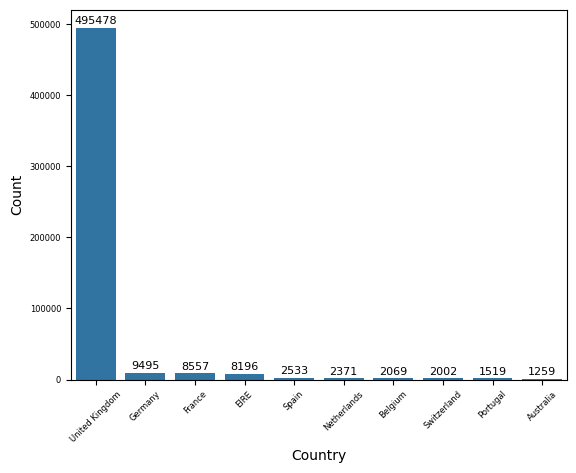

In [100]:
ax = sns.barplot(x = "Country", y = "count", data = country_counts.head(10));

ax.bar_label(ax.containers[0], fontsize=8, padding=1);
ax.set_xticklabels(labels=country_counts["Country"].head(10),size=6, rotation=45);
ax.set_xlabel("Country", size = 10);
ax.set_ylabel("Count", size = 10);





## Examine Description

In [110]:
len(retail["Description"].unique())


4224

In [117]:
retail["Description"].isna().sum()

np.int64(1454)

In [122]:
retail[retail["Description"].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [128]:
retail[retail["Description"].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [129]:
retail[(retail["Description"].isna()) & (retail["CustomerID"].isna())] #All NA descriptions have NA Customer IDs

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [132]:
retail["CustomerID"].isna().sum() #There are more NA CustomerIDs than just those that overlap with NA Descriptions

np.int64(135080)